 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [49]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [50]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns = pd.read_csv(whale_returns_csv, index_col = 'Date', parse_dates=True, infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [51]:
# Count nulls
# YOUR CODE HERE
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [52]:
# Drop nulls
# YOUR CODE HERE
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [53]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [54]:
# Count nulls
# YOUR CODE HERE
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [55]:
# Drop nulls
# YOUR CODE HERE
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [56]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(ascending=True, inplace=True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [57]:
# Check Data Types
# YOUR CODE HERE
sp500_history.dtypes

Close    object
dtype: object

In [58]:
# Fix Data Types
# YOUR CODE HERE
sp500_history['Close'] = sp500_history['Close'].str.replace('$', ' ')
sp500_history['Close'] = sp500_history['Close'].astype('float')
sp500_history
sp500_history.dtypes

Close    float64
dtype: object

In [59]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [60]:
# Drop nulls
# YOUR CODE HERE
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [61]:
# Rename Column
# YOUR CODE HERE
sp500_returns.rename(columns={'Close':'S&P 500'}, inplace=True)
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [62]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
all_returns= pd.concat([whale_returns, algo_returns, sp500_returns], axis='columns', join='inner')
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

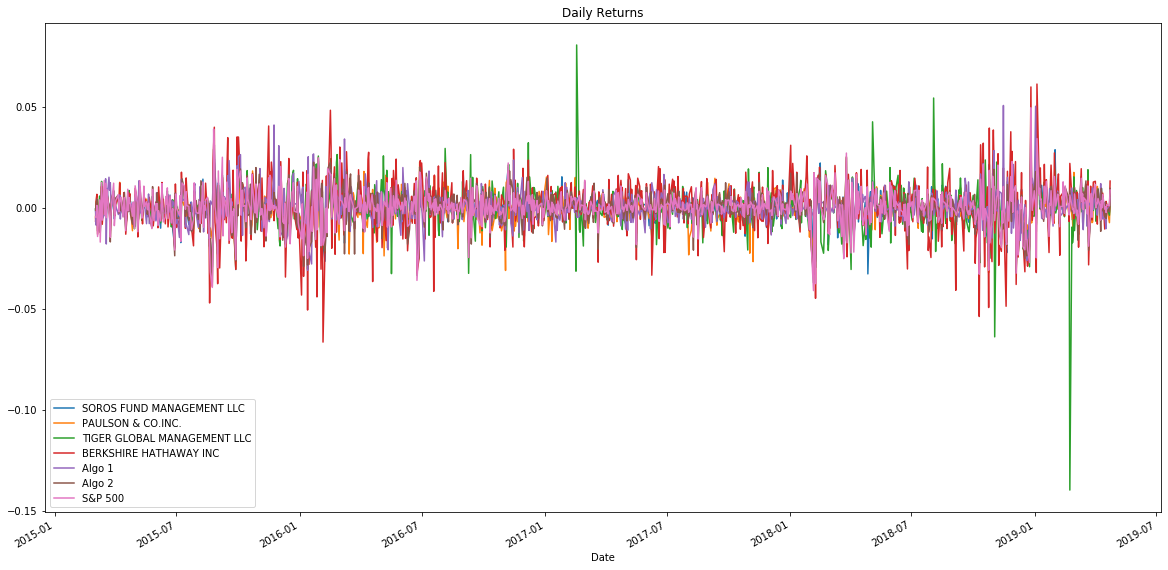

In [63]:
# Plot daily returns
# YOUR CODE HERE
all_returns.plot(title='Daily Returns', figsize=(20,10))

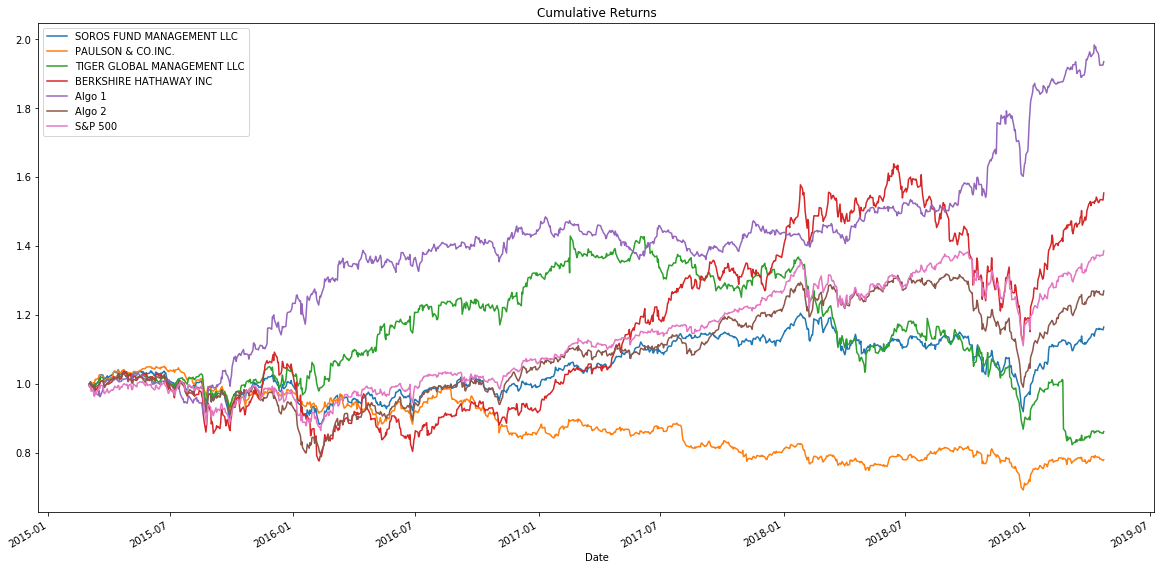

In [64]:
# Plot cumulative returns
# YOUR CODE HERE
cum_returns = (1 + all_returns).cumprod()
cum_returns.plot(title='Cumulative Returns', figsize=(20,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

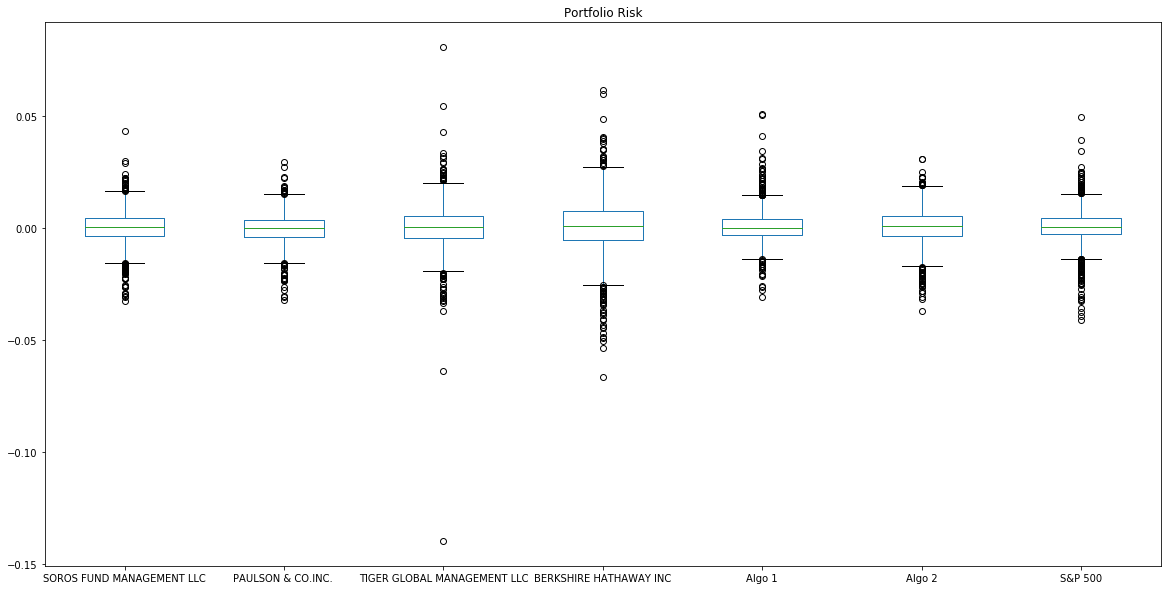

In [65]:
# Box plot to visually show risk
# YOUR CODE HERE
all_returns.plot(kind='box', title = 'Portfolio Risk', figsize=(20,10))

In [66]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
all_std = all_returns.std()
all_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [67]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
print(all_std > all_std['S&P 500'])

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool


In [68]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = all_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
2. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?

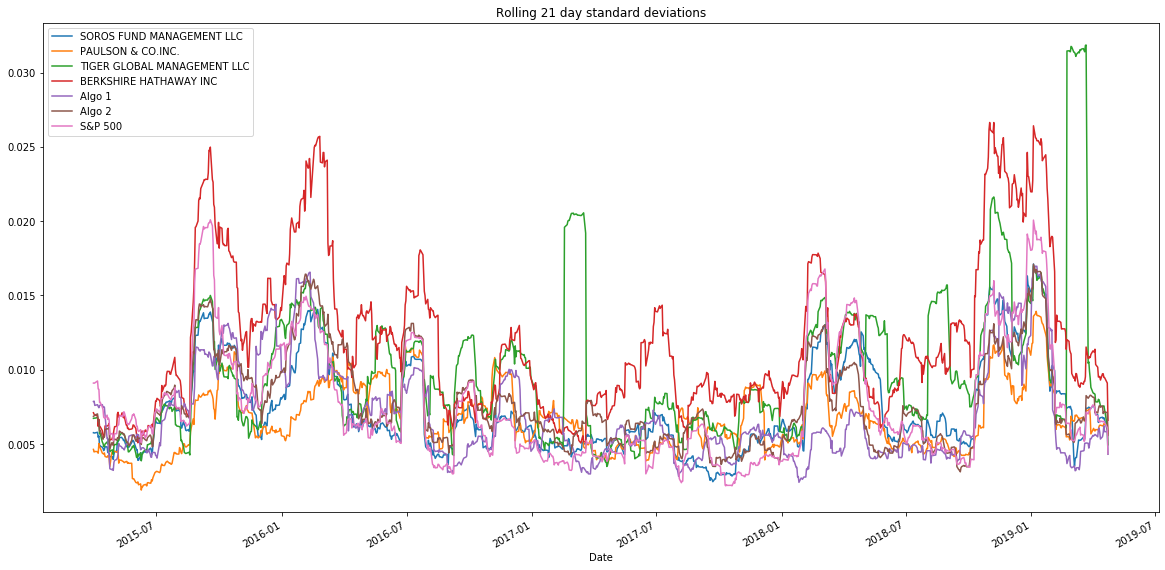

In [69]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
rolling_std = all_returns.rolling(window=21).std()
rolling_std.dropna(inplace=True)
ax= rolling_std.plot(figsize=(20, 10), title='Rolling 21 day standard deviations')

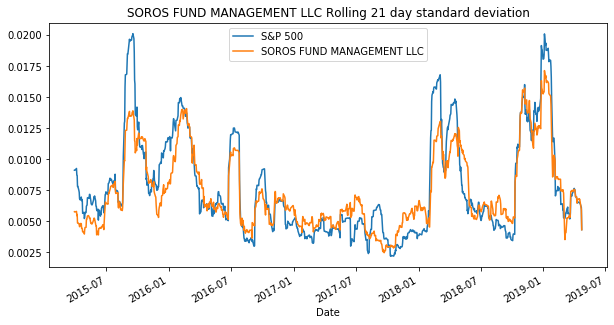

In [70]:
# Since it is too complex, we're going to plot each portfolio separately comparing to S&P 500
# For doing that, we will define a function called rolling_std
def rolling_std_func(column):
    ax = all_returns['S&P 500'].rolling(window=21).std().plot(figsize=(10,5), legend=True)
    y = all_returns[column].rolling(window=21).std().plot(ax=ax, title=f'{column} Rolling 21 day standard deviation', legend=True)
    return y
# Now, we're going to plot each portfolio by iteration over the function to see clearer comparison.
rolling_std_func(all_returns.columns[0])

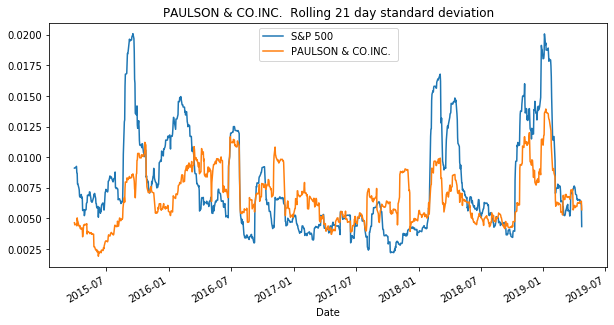

In [71]:
# SOROS FUND has a quite similar trend as S&P 500
rolling_std_func(all_returns.columns[1])

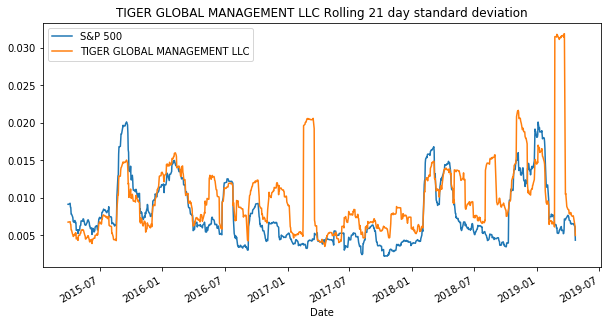

In [72]:
# PAULSON shows a trend less similar to S&P 500 than SOROS
rolling_std_func(all_returns.columns[2])

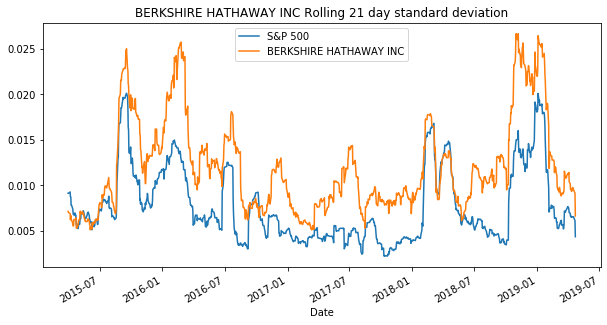

In [73]:
# TIGER looks less following the S&P 500, especially early 2017, late 2017 through 2018 and 1H2019.
rolling_std_func(all_returns.columns[3])

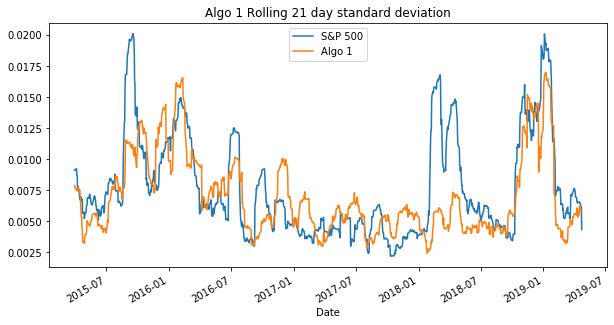

In [74]:
# BERKSHIRE had followed the market trend until 1Q2017. After then, it had decoupled through 3Q2018.
rolling_std_func(all_returns.columns[4])

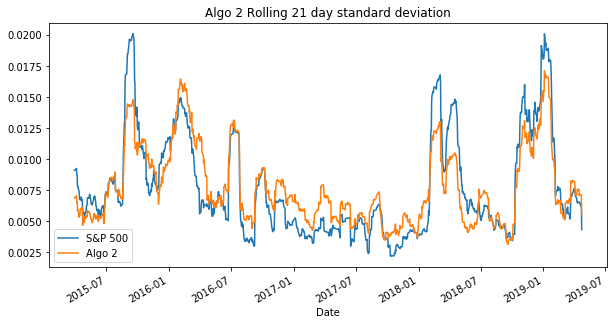

In [75]:
rolling_std_func(all_returns.columns[5])

In [76]:
#In conclusion, SOROS and Algo2 showed a similar trend to the market risk, while TIGER and BERKSHIRE followed less. 

In [77]:
# Construct a correlation table
# YOUR CODE HERE
correlation = all_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


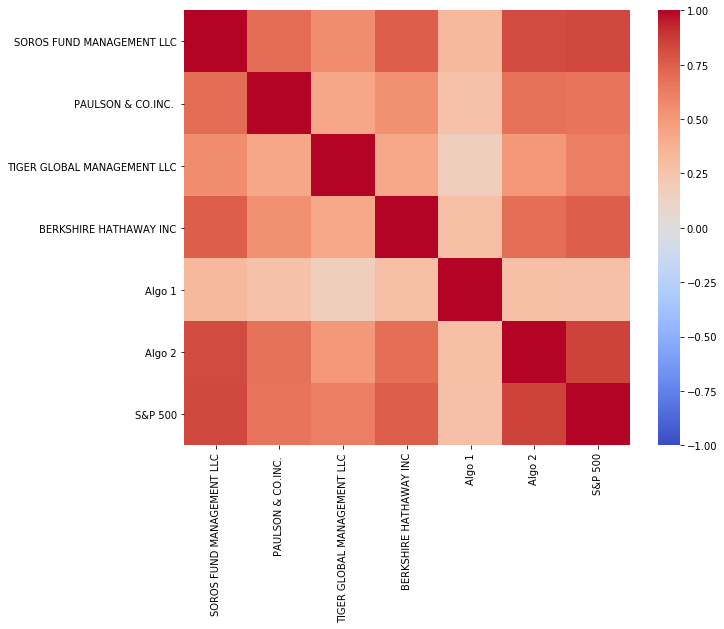

In [78]:
# Heatmap would help overviewing the result.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, vmin=-1, vmax=1, cmap='coolwarm')

In [79]:
### We can see 'Algo 2' mostly mimics the S&P ###

In [80]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
beta_dict = {}
for name in all_returns.columns:
    covariance = all_returns[name].cov(all_returns['S&P 500'])
    variance = all_returns['S&P 500'].var()
    beta = round(covariance / variance, 4)
    beta_dict[name] = beta
beta_dict

{'SOROS FUND MANAGEMENT LLC': 0.7734,
 'PAULSON & CO.INC. ': 0.5499,
 'TIGER GLOBAL MANAGEMENT LLC': 0.7947,
 'BERKSHIRE HATHAWAY INC': 1.1348,
 'Algo 1': 0.249,
 'Algo 2': 0.8375,
 'S&P 500': 1.0}

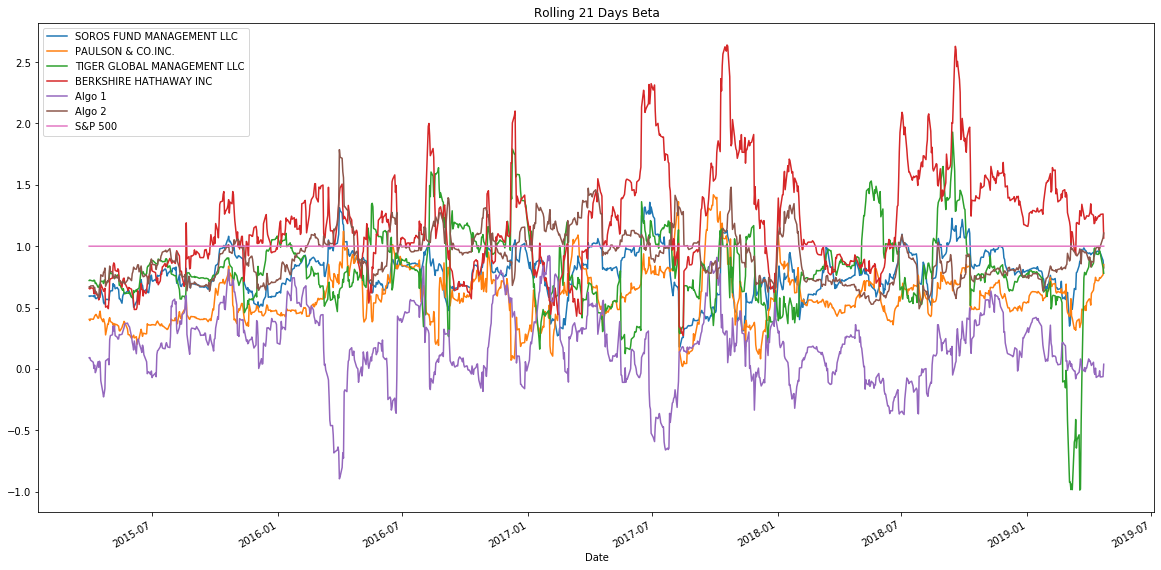

In [81]:
# plot beta
def rolling_beta(window):
    beta_dict={}
    for name in all_returns.columns:
        covariance = all_returns[name].rolling(window=window).cov(all_returns['S&P 500'])
        variance = all_returns['S&P 500'].rolling(window=window).var()
        beta = round(covariance / variance, 4)
        beta_dict[name] = beta
    return beta_dict

fig, ax = plt.subplots()
beta_dict = rolling_beta(21)
for x, y in beta_dict.items():
    y.plot(ax=ax, label=x, figsize=(20,10), title = 'Rolling 21 Days Beta')
    plt.legend()


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

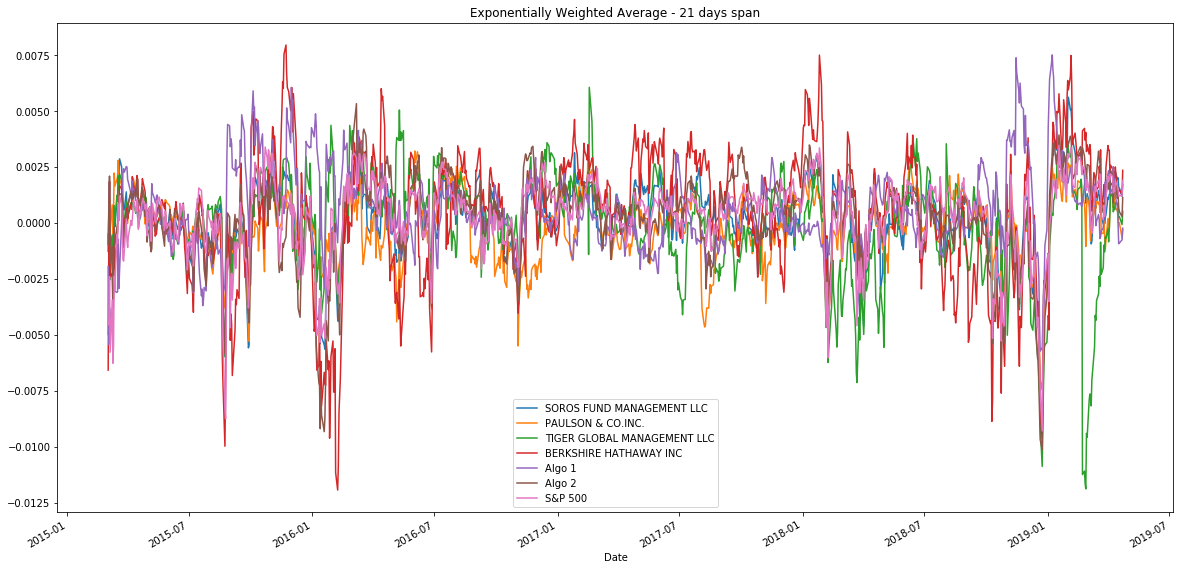

In [82]:
# (OPTIONAL) YOUR CODE HERE
all_returns.ewm(span=21).mean().plot(figsize=(20,10), title='Exponentially Weighted Average - 21 days span')

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [83]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
annualized_return = all_returns.mean() * 252
annualized_std = all_returns.std() * np.sqrt(252)
sharpe_ratio = (annualized_return / annualized_std).sort_values()
sharpe_ratio

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Algo 1                         1.378648
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

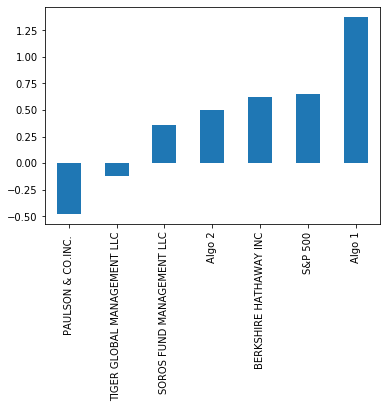

In [84]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratio.plot(kind='bar')

In [85]:
# Algo 1 outperforms both the market and the whales. Algo 2, the mostly mimicking the market index, slightly less performs than the market 
# but outperforms the whales except for BERKSHIRE.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [86]:
# Read the first stock
# YOUR CODE HERE
csvpath = Path("Resources/aapl_historical.csv")
aapl = pd.read_csv(csvpath, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
aapl.sort_index(inplace=True)
aapl

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99
...,...,...
2019-05-03,AAPL,211.75
2019-05-06,AAPL,208.48
2019-05-07,AAPL,202.86


In [87]:
# Read the second stock
# YOUR CODE HERE
csvpath = Path("Resources/cost_historical.csv")
cost = pd.read_csv(csvpath, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost.sort_index(inplace=True)
cost

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60
...,...,...
2019-05-03,COST,244.62
2019-05-06,COST,244.23
2019-05-07,COST,240.18


In [88]:
# Read the third stock
# YOUR CODE HERE
csvpath = Path("Resources/goog_historical.csv")
goog = pd.read_csv(csvpath, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog.sort_index(inplace=True)
goog

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
...,...,...
2019-05-03,GOOG,1185.40
2019-05-06,GOOG,1189.39
2019-05-07,GOOG,1174.10


In [89]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
new_stocks = pd.concat([aapl, cost, goog], axis='rows', join="inner")
new_stocks

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99
...,...,...
2019-05-03,GOOG,1185.40
2019-05-06,GOOG,1189.39
2019-05-07,GOOG,1174.10


In [90]:
# Reset the index
# YOUR CODE HERE
new_stocks.reset_index()

,Trade DATE,Symbol,NOCP
0,2018-05-11,AAPL,188.59
1,2018-05-14,AAPL,188.15
2,2018-05-15,AAPL,186.44
3,2018-05-16,AAPL,188.18
4,2018-05-17,AAPL,186.99
...,...,...,...
745,2019-05-03,GOOG,1185.40
746,2019-05-06,GOOG,1189.39
747,2019-05-07,GOOG,1174.10
748,2019-05-08,GOOG,1166.27


In [91]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
new_stocks = new_stocks.pivot_table(values='NOCP', index='Trade DATE', columns='Symbol')
new_stocks

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [92]:
# Drop Nulls
# YOUR CODE HERE
new_stocks.dropna()
new_stocks.index.names=['date']
new_stocks

Symbol,AAPL,COST,GOOG
date,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [93]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
new_daily_returns = new_stocks.pct_change()
new_returns = new_daily_returns.dot(weights)
new_returns

date
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 250, dtype: float64

## Join your custom portfolio returns to the DataFrame that contains all of the portfolio returns

In [94]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
agg_returns = pd.concat([all_returns, new_daily_returns], axis='columns', join="inner")
agg_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AAPL,COST,GOOG
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708,NaN,NaN,NaN
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,-0.002333,0.000613,0.001766
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.009088,-0.002042,-0.019060
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009333,0.016523,0.002354
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.006324,0.004479,-0.002940
...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000100,-0.004019,0.004938
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.019473,0.000897,0.007505
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.003594,0.001018,0.000024
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.003287,-0.009723,0.010086


In [95]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
agg_returns.dropna(inplace=True)
agg_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AAPL,COST,GOOG
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,-0.002333,0.000613,0.001766
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.009088,-0.002042,-0.019060
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009333,0.016523,0.002354
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.006324,0.004479,-0.002940
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.003637,-0.003206,-0.011339
...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000100,-0.004019,0.004938
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.019473,0.000897,0.007505
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.003594,0.001018,0.000024
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.003287,-0.009723,0.010086


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [96]:
# Risk
# YOUR CODE HERE
agg_std = agg_returns.std()
agg_std

SOROS FUND MANAGEMENT LLC      0.009240
PAULSON & CO.INC.              0.007353
TIGER GLOBAL MANAGEMENT LLC    0.014648
BERKSHIRE HATHAWAY INC         0.015569
Algo 1                         0.008423
Algo 2                         0.008791
S&P 500                        0.009578
AAPL                           0.018706
COST                           0.013357
GOOG                           0.016095
dtype: float64

In [97]:
# Determine which portfolios are riskier than the S&P 500
print(agg_std > agg_std['S&P 500'])

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
AAPL                            True
COST                            True
GOOG                            True
dtype: bool


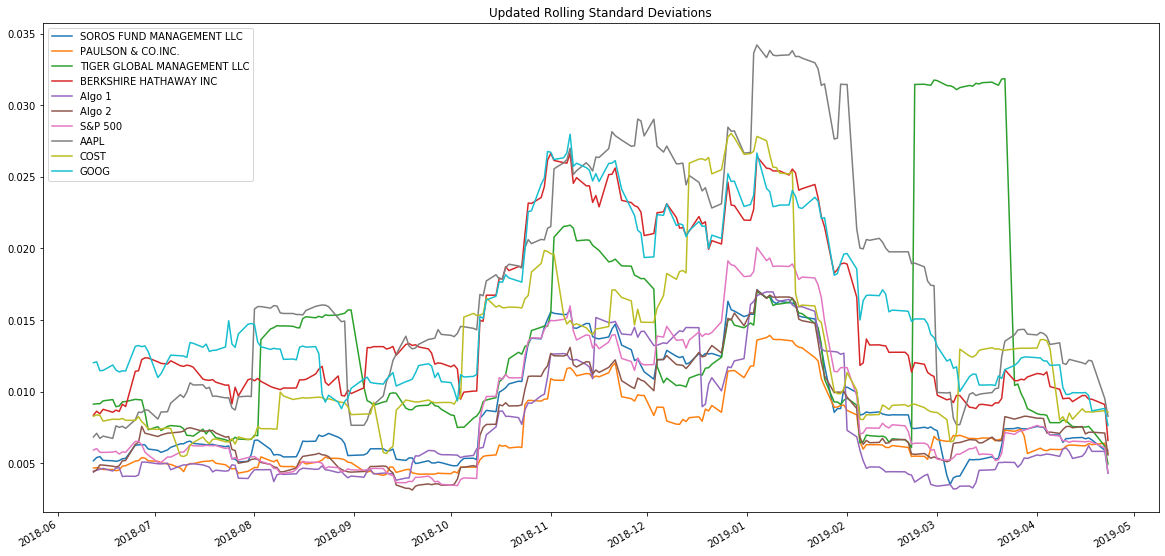

In [98]:
# Rolling
# YOUR CODE HERE
rolling_agg_std = agg_returns.rolling(window=21).std()
rolling_agg_std.dropna(inplace=True)
rolling_agg_std.plot(title='Updated Rolling Standard Deviations', figsize=(20,10))

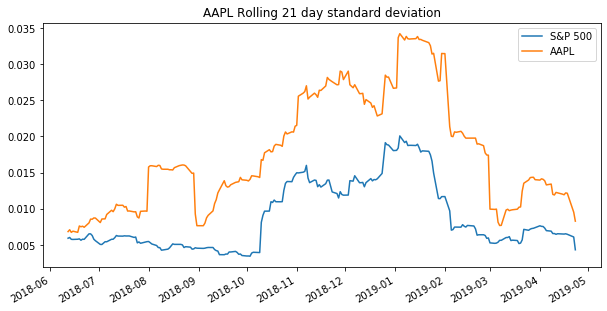

In [99]:
# for better comparison, plot each new portfolio in comparison with S&P 500
def rolling_std_func(column):
    ax = agg_returns['S&P 500'].rolling(window=21).std().plot(figsize=(10,5), legend=True)
    y = agg_returns[column].rolling(window=21).std().plot(ax=ax, title=f'{column} Rolling 21 day standard deviation', legend=True)
    return y
rolling_std_func(agg_returns.columns[7])

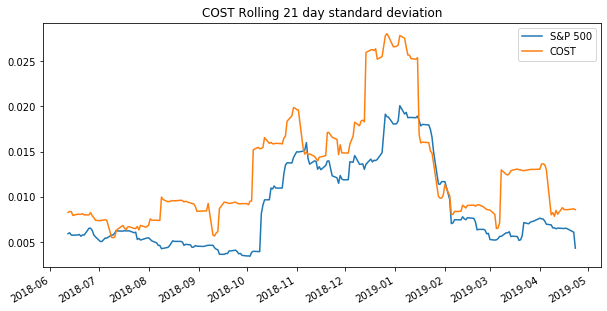

In [100]:
# AAPL had two considerable periods that had decoupled the market: firstly, during Aug-Sep 2018 and Nov 2018 to Jan 2019. 
# Individual risk were increased while the market was in stabilized or decreased trends. 
rolling_std_func(agg_returns.columns[8])

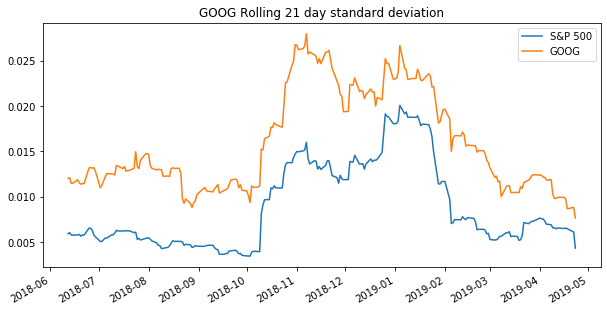

In [101]:
# COST mostly follows the market trend but little lagging. Comprehensively, COST shows less volatility than the market.
rolling_std_func(agg_returns.columns[9])

In [102]:
#  GOOG is likely following the market trend, showing a strong correlation.

In [103]:
# Beta
# YOUR CODE HERE
beta_dict = {}
for name in agg_returns.columns:
    covariance = agg_returns[name].cov(agg_returns['S&P 500'])
    variance = agg_returns['S&P 500'].var()
    beta = round(covariance / variance, 4)
    beta_dict[name] = beta
beta_dict

{'SOROS FUND MANAGEMENT LLC': 0.846,
 'PAULSON & CO.INC. ': 0.5886,
 'TIGER GLOBAL MANAGEMENT LLC': 0.7356,
 'BERKSHIRE HATHAWAY INC': 1.3854,
 'Algo 1': 0.2544,
 'Algo 2': 0.8037,
 'S&P 500': 1.0,
 'AAPL': 1.4841,
 'COST': 0.8232,
 'GOOG': 1.3309}

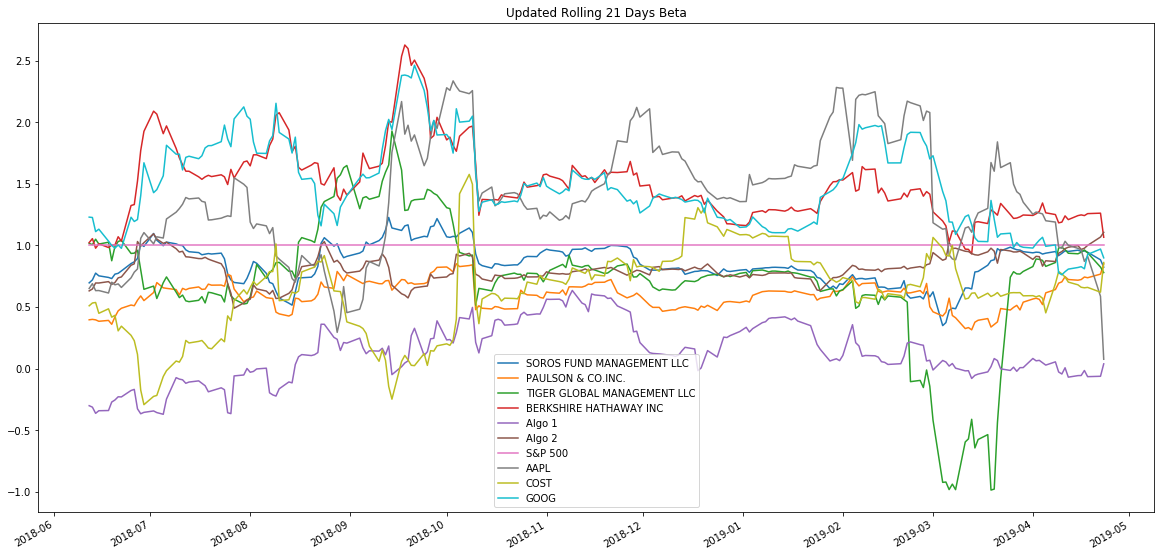

In [104]:
# plot beta
def rolling_beta(window):
    beta_dict={}
    for name in agg_returns.columns:
        covariance = agg_returns[name].rolling(window=window).cov(agg_returns['S&P 500'])
        variance = agg_returns['S&P 500'].rolling(window=window).var()
        beta = round(covariance / variance, 4)
        beta_dict[name] = beta
    return beta_dict

fig, ax = plt.subplots()
beta_dict = rolling_beta(21)
for x, y in beta_dict.items():
    y.plot(ax=ax, label=x, figsize=(20,10), title = 'Updated Rolling 21 Days Beta')
    plt.legend()

In [105]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
new_sharpe_ratio = (agg_returns.mean() * 252) / (agg_returns.std() * np.sqrt(252))
new_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
AAPL                           0.490850
COST                           1.244419
GOOG                           0.714034
dtype: float64

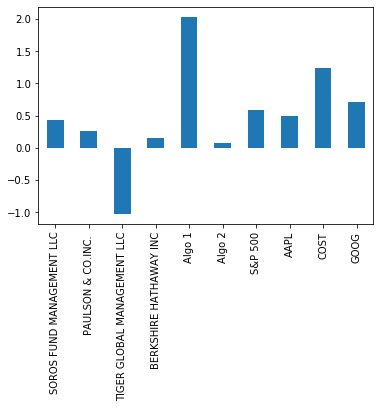

In [106]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
new_sharpe_ratio.plot(kind='bar')

## Include correlation analysis to determine which stocks (if any) are correlated

In [107]:
# YOUR CODE HERE
correlation = agg_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,AAPL,COST,GOOG
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.609126,0.518175,0.682919
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.544949,0.496810,0.554123
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.334864,0.353235,0.291055
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.694062,0.431956,0.824391
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.224385,0.139522,0.272740
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.639512,0.496460,0.682227
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.759909,0.590297,0.792070
AAPL,0.609126,0.544949,0.334864,0.694062,0.224385,0.639512,0.759909,1.000000,0.433918,0.692497
COST,0.518175,0.496810,0.353235,0.431956,0.139522,0.496460,0.590297,0.433918,1.000000,0.410074
GOOG,0.682919,0.554123,0.291055,0.824391,0.272740,0.682227,0.792070,0.692497,0.410074,1.000000


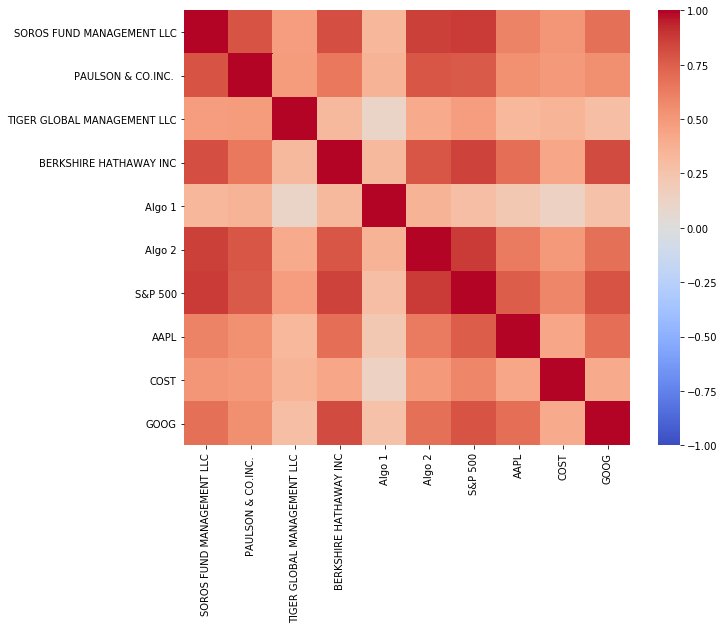

In [108]:
# plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation, vmin=-1, vmax=1, cmap='coolwarm')

In [109]:
# From the plot, GOOG correlates with both BERKSHIRE and the market